In [1]:
!pip install tensorflow==2.12.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [8]:
# import basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# Divide the dataset into independent and dependent features

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [14]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()
# Divide the dataset into independent and dependent features

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
X.head()
y.head()
# Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first=True) # converts into one hot encoding
gender = pd.get_dummies(X['Gender'], drop_first=True)
geography.head()

#Correctly concatenate the features
X = pd.concat([X, geography, gender], axis=1)

# Drop original columns
X = X.drop(['Geography', 'Gender'], axis=1)

X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [15]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
# feature scaling -- converting into a standard scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train.shape

(8000, 11)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [18]:
# Lets initialize the ANN
classifier = Sequential()

In [35]:
# Adding the input layer
classifier.add(Dense(units=10, activation='relu'))

# Adding the First hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

# Adding the 2nd hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))



In [36]:
# Adding Output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [37]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# by default adam uses a learning rate of 0.01


In [39]:
# Early Stopping
import tensorflow as tf
from tensorflow import keras
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [40]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks = early_stopping )

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7859 - loss: 0.5696 - val_accuracy: 0.7955 - val_loss: 0.4187
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8229 - loss: 0.4203 - val_accuracy: 0.8360 - val_loss: 0.3877
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8397 - loss: 0.3972 - val_accuracy: 0.8565 - val_loss: 0.3761
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8603 - loss: 0.3770 - val_accuracy: 0.8463 - val_loss: 0.3740
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8512 - loss: 0.3829 - val_accuracy: 0.8618 - val_loss: 0.3727
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8667 - loss: 0.3689 - val_accuracy: 0.8410 - val_loss: 0.3761
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8470 - loss: 0.3971 - val_accuracy: 0.8588 - val_loss: 0.3675
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8627 - loss: 0.3507 -

In [41]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

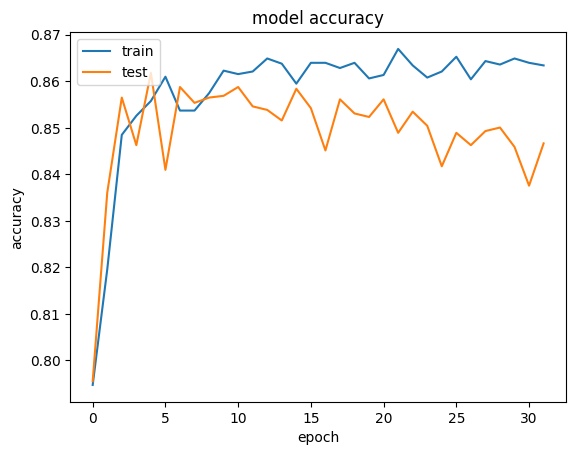

In [42]:
# summarize history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

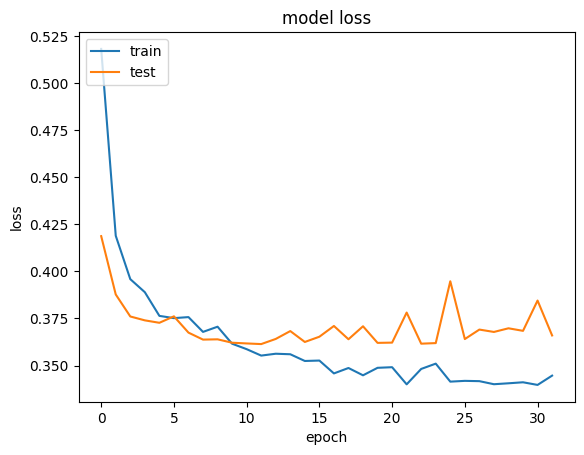

In [43]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
# Predicting the test set

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1568,   27],
       [ 254,  151]])

In [46]:
# accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8595

In [47]:
# get the weights
classifier.get_weights()

[array([[-0.26266843, -0.14486012,  0.33017015, -0.01446929,  0.23848218,
         -0.12560505,  0.01793488, -0.22320822,  0.01437554, -0.16371906],
        [ 0.08556372, -0.38968235, -0.6701351 , -0.23834978,  0.14160493,
          0.2604547 ,  0.55287   ,  0.13565353,  0.3932474 ,  1.2227105 ],
        [ 0.5975761 , -0.217602  , -0.04725042,  0.33637816, -0.257222  ,
          0.41787502, -0.10926192,  0.0124168 , -0.29749817,  0.19454886],
        [ 0.54912454, -0.01363648, -0.29651183, -0.87570566,  0.9967233 ,
         -0.1288721 ,  0.09349465, -0.7729527 , -0.31080678, -0.538407  ],
        [ 0.6987189 , -0.44658253, -0.10524561,  0.5257512 ,  0.5522744 ,
          0.49267218, -1.3041204 , -1.1594505 ,  1.4271579 ,  0.17230678],
        [-0.2924601 ,  0.17873226, -0.15981673, -0.00361929,  0.06534635,
          0.17846024, -0.11636311,  0.08322998, -0.05619612,  0.16494729],
        [ 0.2565802 , -0.7259293 ,  0.3333049 , -0.27506298,  0.06889444,
         -0.8454834 , -0.4227080

In [48]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# New Section